In [1]:
import requests
import os
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
stock_df = pd.read_csv("Resources/stock_data.csv", index_col="date", infer_datetime_format=True, parse_dates=True)['close']
stock_df = stock_df.sort_index()
stock_df.tail()

date
2021-03-15    707.94
2021-03-16    676.63
2021-03-17    701.54
2021-03-18    653.30
2021-03-19    654.97
Name: close, dtype: float64

In [3]:
returns = stock_df.pct_change()
returns.dropna(inplace=True)
returns.head()

date
2020-10-27    0.009972
2020-10-28   -0.043515
2020-10-29    0.011429
2020-10-30   -0.055036
2020-11-02    0.032136
Name: close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

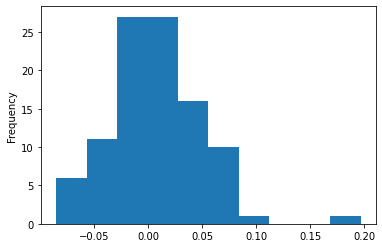

In [4]:
returns.plot(kind="hist")

In [5]:
mean = returns.mean()
std = returns.std()
(mean, std)

(0.005423240858099577, 0.043911763687547144)

In [6]:
from random import gauss
gauss(mean, std)

0.017111914555243433

In [7]:
last_val = stock_df.iloc[-1]
last_val

654.97

In [8]:
last_val * (1+gauss(mean,std))

658.5396150600951

In [9]:
simvals = [last_val]
days = 15
for day in range(days):
    newval = simvals[:]

In [10]:
def simulate_stocks(days,starting_val):
    simvals = [starting_val]
    
    for day in range(days):
        newval = simvals[-1] * (1+gauss(mean,std))
        simvals.append(newval)
        

    return simvals

In [11]:
simulate_stocks(30,last_val)

[654.97,
 619.8930661712415,
 621.4424169152554,
 629.9577113536731,
 660.8634909691151,
 672.6226551187527,
 710.4304683395918,
 674.4416339923785,
 690.6861278891809,
 714.2941697418565,
 747.4388225685817,
 761.3100158741604,
 781.3070747249074,
 771.8521190048938,
 829.5156872374847,
 907.0739038828534,
 868.5929622048046,
 861.1022523840384,
 845.207314133894,
 855.8067309928367,
 829.5276945948879,
 867.0005235022202,
 863.9645856044428,
 796.8382324860904,
 823.6226470398278,
 849.347890692853,
 811.2935209410969,
 781.4512559661927,
 830.7818392198295,
 846.0746481873349,
 847.2921064444205]

In [12]:
trials =1000
results = []
for trial in range(trials):
    results.append(simulate_stocks(15,last_val))

In [13]:
pd.DataFrame(results).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,654.97,658.660111,657.798800,632.020676,635.740076,674.868008,627.850938,602.205082,624.445360,616.451948,626.207929,622.296734,649.748549,641.130616,668.836121,703.928998
1,654.97,642.003652,633.441808,672.620940,656.069011,632.026064,624.738286,633.731816,626.076960,597.191315,637.484514,602.864397,654.942900,674.539015,628.319473,603.486163
2,654.97,700.778211,720.580364,676.996842,741.564725,708.632745,753.505491,765.284078,796.850600,793.577926,816.991233,817.267122,837.388442,841.496489,890.948202,941.861119
3,654.97,668.893844,640.254718,645.684420,642.291802,659.699349,672.982356,714.465037,717.564338,710.785002,647.692219,662.964990,678.177096,690.982091,665.182200,668.173324
4,654.97,664.219385,668.418597,656.747664,668.983453,683.637736,679.510112,672.214483,693.355627,699.073352,690.771774,714.636388,749.566335,697.357634,689.350273,717.542244


In [14]:
results_df = pd.DataFrame(results).T
results_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,654.970000,654.970000,654.970000,654.970000,654.970000,654.970000,654.970000,654.970000,654.970000,654.970000,...,654.970000,654.970000,654.970000,654.970000,654.970000,654.970000,654.970000,654.970000,654.970000,654.970000
1,658.660111,642.003652,700.778211,668.893844,664.219385,622.366111,665.025922,661.490442,648.795986,660.427864,...,693.336501,669.532872,649.232596,602.772854,686.598563,598.595004,636.112708,662.220897,654.489225,623.518321
2,657.798800,633.441808,720.580364,640.254718,668.418597,620.498050,637.340662,647.880983,684.821552,675.869291,...,650.915393,647.765089,687.214116,607.793375,689.382330,616.303386,610.749348,717.497617,676.190864,687.456458
3,632.020676,672.620940,676.996842,645.684420,656.747664,601.998653,638.982400,636.869247,721.411616,721.526287,...,582.912333,649.156762,660.623067,621.868644,697.895737,533.387496,583.378081,766.959333,630.922903,732.492503
4,635.740076,656.069011,741.564725,642.291802,668.983453,626.572041,627.717246,640.788970,731.740747,734.137472,...,570.447936,644.898682,640.862549,657.047048,706.798591,520.053260,590.112312,743.218997,637.197111,747.069642


<AxesSubplot:>

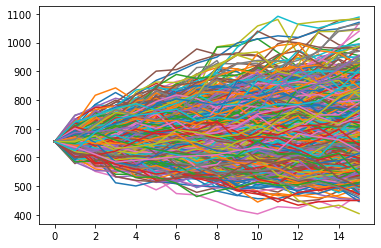

In [15]:
results_df.plot(legend=False)

In [16]:
end_values = results_df.iloc[-1]
end_values.head()

0    703.928998
1    603.486163
2    941.861119
3    668.173324
4    717.542244
Name: 15, dtype: float64

<AxesSubplot:ylabel='Frequency'>

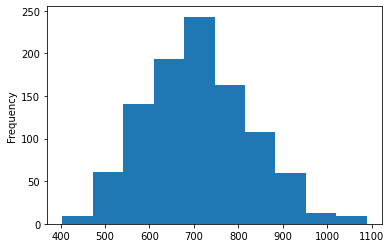

In [17]:
end_values.plot(kind="hist")

In [18]:
end_values.quantile([0.1,0.9])

0.1    559.720392
0.9    868.085816
Name: 15, dtype: float64

In [20]:
last_val

654.97